Group Members: Garrit Hotchkiss, Isabel Petrescu, Benjamin Johnson, Jacob Marquez
# CMSE 202 Final Project #
For this group project, our goal is to compare the spread of the influenza virus among the Michigan State University campus and several other college campuses. We accomplish this goal using an agent-based model (ABM) to represent each location with the population and size for the model comparable to the actual population and size of the location.

In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import specific libraries needed for the animation
from IPython.display import display, clear_output
import time  
import imageio

In [2]:
#function that inputs a 2D array that we will create later on
def plotgrid(myarray):
    
    # creates a range of numbers that we will use to make a grid
    x_range = np.linspace(0, myarray.shape[0], myarray.shape[0]) 
    y_range = np.linspace(0, myarray.shape[0], myarray.shape[0])
    
    # creates our grid that we can use to index. Think of chess coordinates
    #If this is still unclear copy the example code below and inspect it
    #x_example=np.linspace(0,5,5)
    #y_example=np.linspace(0,5,5)
    #b,c=np.meshgrid(x_example,y_example)
    #print(b)
    #print(c)
    x_indices, y_indices = np.meshgrid(x_range, y_range)
    
    # assigning susceptible, infected, recovered, and immune from our grid a value. 1,2,3,4 respectively.
    # we are essentially putting our grid and our coordinate system together. 
    #this returns two lists. one list is all the coordinates of the x-axis associated with the specified boolean
    #the other is a list of the associated y coordinates for the boolean.
    susc_x = x_indices[myarray == 1];   
    susc_y = y_indices[myarray == 1];
    
    infected_x = x_indices[myarray == 2];   
    infected_y = y_indices[myarray == 2];
    
    #recovered_x = x_indices[myarray == 3]
    #recovered_y = y_indices[myarray == 3]
    
    immune_x = x_indices[myarray == 4]
    immune_y = y_indices[myarray == 4]
    
    # This plots the x and y coordinates together and also assigns them a color and size (so it looks good)
    plt.plot(susc_x, susc_y, 'gs',markersize = 10)   
    plt.plot(infected_x, infected_y, 'rs',markersize = 10)
    #plt.plot(recovered_x, recovered_y, "ys", markersize = 10)
    plt.plot(immune_x, immune_y, 'bs', markersize = 10)
    
    # This sets the xlim and ylims. if you are confused with these limits,
    #try changing the -1 to a 0 to see what happens. 
    plt.xlim([-1,myarray.shape[0]+1])
    plt.ylim([-1,myarray.shape[0]+1]) 

    # This is changing the plot parameters and is removing ticks and labels
    plt.tick_params(axis='both', which='both',
                    bottom='off', top='off', left='off', right='off',
                    labelbottom='off', labelleft='off')

In [3]:
def set_board(board_size, immune, infected, pop):
    '''
    This creates the initial game board with user provided inputs for board_size, 
    representing the number of rows (or columns) on the board, immune, representing the immunity rate, 
    infected, representing the infection rate of the virus, and pop, the population density 
    of individuals on the board.
    '''
    # create a 2D board of zeros
    game_board = np.zeros((board_size, board_size),dtype='int64')
    
    #loops through every index in the board and will potentially change the 'empty' (0) to something else
    #based on the above probability. 
    # np.random.random() returns a real number between 0 and 1 randomly
    for i in range(board_size):
        
        for j in range(board_size):
            
            if np.random.random() <= pop:
                
                # make the location a susceptible house
                game_board[i,j] = 1
            
            elif np.random.random() <= immune:
                
                # make the location an immune house
                game_board[i,j] = 4
                
            elif np.random.random() <= infected:
                
                # make the location an infected house
                game_board[i, j] = 2
    
    # return our starting gameboard
    return game_board

In [4]:
def onBoard(i, j, board):
    
    """This function takes in a row location (i) and a column 
    location (j) on a 2d NumPy array called board"""
    
    # if our i, j index actually exists on the board
    if i <= board.shape[0]-1 and i >= 0 and j <= board.shape[1]-1 and j >= 0:
        
        # then return true
        return True
    
    # if our i, j index doesn't exist on the board
    else:
        
        # then we return false
        return False

In [5]:
# Finish this code
def getNeighborValues(i, j, board):
    
    # The following list contains the indices of the neighbors for a pixel at (i, j)
    neighborhood = [(i-1, j), (i, j-1), (i+1, j), (i, j+1), (i-1,j-1), (i-1,j+1), (i+1,j-1), (i+1,j+1)]
    
    neighbor_values = []
    
    for neighbor in neighborhood:
        if onBoard(neighbor[0],neighbor[1],board):
            neighbor_values.append(board[neighbor[0],neighbor[1]])
    
    return neighbor_values

In [6]:
# Put your answer here

def advance_board(game_board, infect):
    
    '''
    Advances the game board using the given rules.
    
    game_board: the initial game board
    recovery: the recovery rate of an infected
    infect: the infection rate of the virus
    
    Output: the advanced game board
    '''
    
    # create a new array that's just like the original one, but initially 
    # set to all zeros (i.e., totally empty)
    new_board = np.zeros_like(game_board)
   
    empty_count = 0
    immune_count= 0
    infected_count=0

    # loop over each cell in the board and decide what to do.
    for i in range(game_board.shape[0]):
        for j in range(game_board.shape[1]):
            # update new_board if location is empty
            if game_board[i,j] == 0:
                new_board[i,j] = 0
                empty_count += 1
                
            # update new_board if location is recovered
            #if game_board[i,j] == 3:
            #    new_board[i,j] = 3
                
            # update new_board if location is immune
            if game_board[i,j] == 4:
                new_board[i,j] = 4
                immune_count += 1
            
            # update new_board if location is infected, and check to see if they recovered
            if game_board[i,j] == 2:
                new_board[i,j] = 2
                infected_count += 1
                
    
            # if they're susceptible, check to see if they get infected
            if game_board[i,j] == 1:
                # initially make it susceptible
                new_board[i,j] = 1
                # If one of the neighboring cells was infected last turn
                neighbors = getNeighborValues(i,j, game_board)
                for n in neighbors:
                    if n == 2:
                         if np.random.random() < infect:
                            new_board[i,j] = 2
                # (getting those values using the getNeighborValues function)
                # this cell is now infected (remember there is a probability of infection as well!)

    counts = [empty_count, immune_count, infected_count]
    
    # return the new board
    return new_board

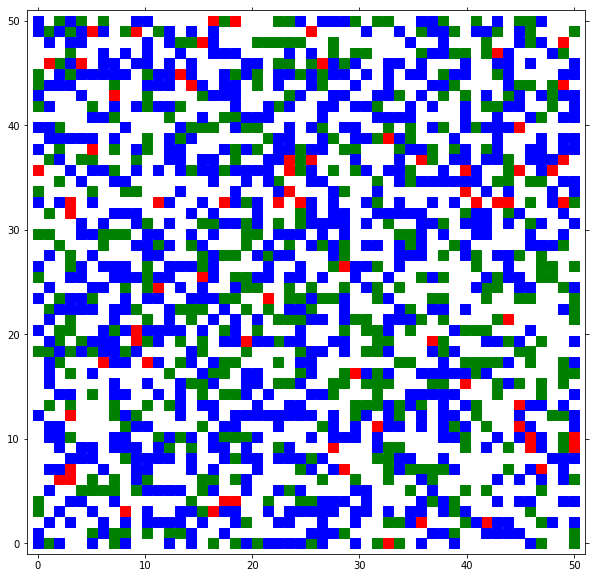

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
# intialize our board size to be 50x50
board_size = 50

# create a 10x10 figure to plot on
fig = plt.figure(figsize=(10,10))

# intialize our board with the following: 10% are immune, 5% are infected, 
# and 80% of houses (cells) are filled
game_board = set_board(board_size = board_size, immune = 0.371, infected = 0.05, pop = .1865)

# plot our initial board
plotgrid(game_board)

# indicator variable if a house is infected or not
infected = True
iterations = 0
imagename = []
# while there is at least one infected house
while infected == True:
    iterations += 1
    # advance our board on iteration or turn with: 
    # 70% chance an infected house recovers (the recovery = .7)
    # 70% chance an infected infects a susceptible person (the infect = .7)
    game_board = advance_board(game_board, infect = 0.024)
    
    
    # plot our advanced board (with some animation commands)
    plotgrid(game_board)
    time.sleep(0.00000000001)  # 
    
    #This part of the code saves the figs as png so we can later turn them into a gif
    fig.savefig("images/img"+str(iterations)+".png")
    imagename.append("images/img"+str(iterations)+".png")
    
    clear_output(wait=True)
    display(fig)
    fig.clear()
    
    
    if iterations > 5:
        infected = False
   
    if (game_board == 2).sum() == 0.0:
        infected = False

# close the figure
plt.close()     


In [8]:
images = []

for img in imagename:
    images.append(imageio.imread(img))
imageio.mimsave('gifs/movie.gif', images)